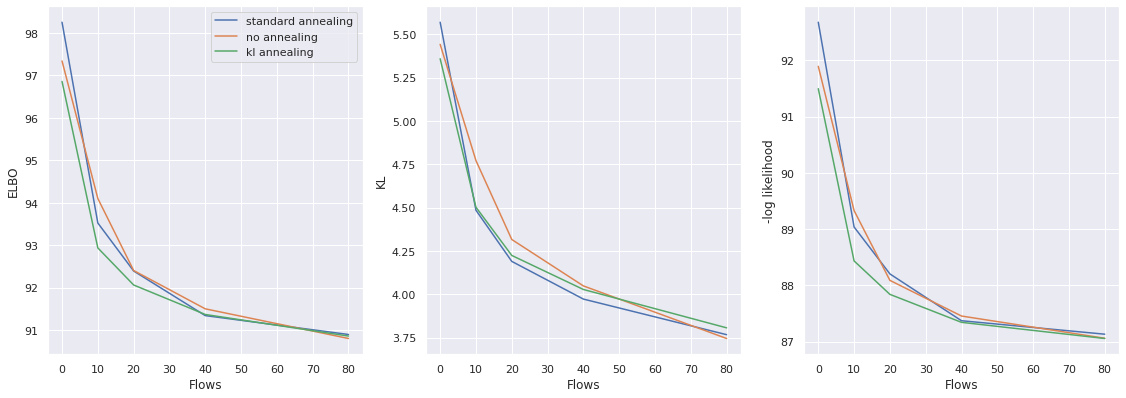

In [12]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

flows = [0, 10, 20, 40, 80]
anneals = ["std", "without", "kl"]

path = "logs/planarflow_k_"

ELBO_stdanneal = []
ELBO_withoutanneal = []
ELBO_klanneal = []

log_likelihood_stdanneal = []
log_likelihood_withoutanneal = []
log_likelihood_klanneal = []

kl_stdanneal = []
kl_withoutanneal = []
kl_klanneal = []

def graph(metric, stdlist, withoutlist, kllist):
    for flow in flows:
        kpath = path + str(flow)
        for anneal in anneals:
            rpath = "results_" + anneal + "annealing.json"
            filepath = os.path.join(kpath, rpath)
            with open(filepath) as file:
                data = json.load(file)
                if anneal == "std":
                    list = stdlist
                elif anneal == "without":
                    list = withoutlist
                elif anneal == "kl":
                    list = kllist
                list.append(data[metric])
    plt.plot(flows, stdlist, label = "standard annealing")
    plt.plot(flows, withoutlist, label = "no annealing")
    plt.plot(flows, kllist, label = "kl annealing")

def klgraph(kl_stdlist, kl_withoutlist, kl_kllist, ELBO_stdlist, ELBO_withoutlist, ELBO_kllist, LL_stdlist, LL_withoutlist, LL_kllist):
    for i in range(5):
        kl_stdlist.append(-1 * LL_stdlist[i] + ELBO_stdlist[i])
        kl_withoutlist.append(-1 * LL_withoutlist[i] + ELBO_withoutlist[i])
        kl_kllist.append(-1 * LL_kllist[i] + ELBO_kllist[i])
    plt.plot(flows, kl_stdlist, label = "standard annealing")
    plt.plot(flows, kl_withoutlist, label = "no annealing")
    plt.plot(flows, kl_kllist, label = "kl annealing")
    
plt.figure(figsize=(19.2,6.4))
plt.subplot(1,3,1)
graph("ELBO", ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal)
plt.xlabel("Flows")
plt.ylabel("ELBO")
plt.legend()
plt.subplot(1,3,3)
graph("Log_likelihood", log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)
plt.xlabel("Flows")
plt.ylabel("-log likelihood")
# plt.legend()
plt.subplot(1,3,2)
klgraph(kl_stdanneal, kl_withoutanneal, kl_klanneal, ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal, log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)
plt.xlabel("Flows")
plt.ylabel("KL")
# plt.legend()
plt.show()

In [13]:
ELBO_stdanneal

[98.24988422393798,
 93.52231342315673,
 92.39241344451904,
 91.34216510772706,
 90.89743492126465]

In [14]:
log_likelihood_stdanneal

[92.68110705446765,
 89.03757873186632,
 88.20261757063433,
 87.36967894434495,
 87.13013864244982]

In [15]:
kl_stdanneal

[5.568777169470337,
 4.484734691290413,
 4.189795873884705,
 3.9724861633821007,
 3.7672962788148254]

In [37]:
ELBO_NICE_10 = [100.08458629608154, 95.60528854370118, 95.6635206604004]
ELBO_NICE_20 = [95.70984016418457, 94.69585426330566, 95.42611427307129]
ELBO_NICE_40 = [94.55785778045654, 94.4517280960083, 93.96711620330811]
ELBO_NICE_80 = [94.35874633789062, 93.42694671630859, 93.77336582183838]
ELBO_NICEs = np.array([ELBO_NICE_10, ELBO_NICE_20, ELBO_NICE_40, ELBO_NICE_80])

NLL_NICE_10 = [94.79752139963671, 91.0265425683455, 91.16407517962023]
NLL_NICE_20 = [90.60006130747362, 89.81288569292589, 90.88404699091478]
NLL_NICE_40 = [89.57043225359483, 89.99069121851488, 89.57381082396074]
NLL_NICE_80 = [89.243662035383745, 89.02913872255846, 88.97452756781145]
NLL_NICEs = np.array([NLL_NICE_10, NLL_NICE_20, NLL_NICE_40, NLL_NICE_80])

KL_NICEs = ELBO_NICEs - NLL_NICEs


In [38]:

ELBO_NICE_mean = ELBO_NICEs.mean(axis=1)
ELBO_NICE_std = ELBO_NICEs.std(axis=1)

NLL_NICE_mean = NLL_NICEs.mean(axis=1)
NLL_NICE_std = NLL_NICEs.std(axis=1)

KL_NICE_mean = KL_NICEs.mean(axis=1)
KL_NICE_std = KL_NICEs.std(axis=1)

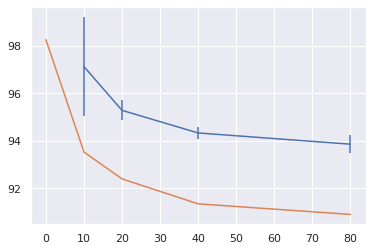

In [39]:
plt.errorbar(flows[1:], ELBO_NICE_mean, yerr=ELBO_NICE_std)
plt.plot(flows, ELBO_stdanneal)

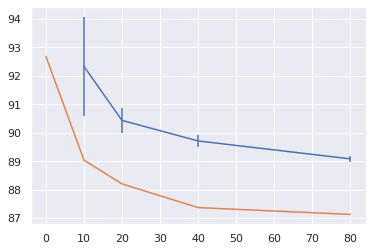

In [40]:
plt.errorbar(flows[1:], NLL_NICE_mean, yerr=NLL_NICE_std)
plt.plot(flows, log_likelihood_stdanneal)

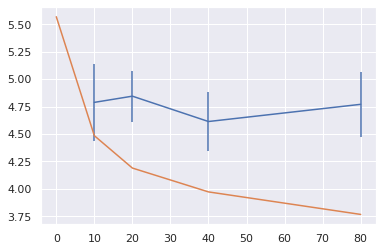

In [42]:
plt.errorbar(flows[1:], KL_NICE_mean, yerr=KL_NICE_std)
plt.plot(flows, kl_stdanneal)